In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
import pandas as pd

# import the data
file = 'CAR_HISTORICALDATA.xlsx'
df = pd.read_excel(file)
df.columns = ["Date", "Value"]
df.head()

,Date,Value
0,1998-03-01,0.144047
1,1998-04-01,0.113069
2,1998-05-01,0.152788
3,1998-06-01,0.113146
4,1998-07-01,0.132997


In [2]:
# changing the datetime
rng = pd.date_range(start="1998-02-01", end="2019-12-01", freq="MS")
import random
for i in range(0, 12):
    randnum = random.randint(1,262)
    rng = rng.delete([randnum])
df['Date'] = rng
df

,Date,Value
0,1998-02-01,0.144047
1,1998-03-01,0.113069
2,1998-04-01,0.152788
3,1998-05-01,0.113146
4,1998-06-01,0.132997
5,1998-07-01,0.092824
6,1998-08-01,0.076596
7,1998-09-01,0.129516
8,1998-10-01,0.127546
9,1998-11-01,0.131181


In [6]:
import os
os.getcwd()

'/home/phanmanhtung/Desktop/internship'

In [9]:
export_excel = df.to_excel(r'/home/phanmanhtung/Desktop/internship/exported_excel.xlsx')

            Value
count  251.000000
mean     0.110646
std      0.026975
min      0.060596
25%      0.086698
50%      0.113069
75%      0.133009
max      0.168795
        Date     Value
0 1998-02-01  0.144047
1 1998-03-01  0.113069
2 1998-04-01  0.152788
3 1998-05-01  0.113146
4 1998-06-01  0.132997


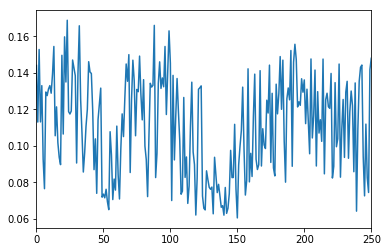

In [3]:
df['Value'].plot()
print(df.describe())
print(df.head())

# Simple Exponential Smoothing (SES)

In [4]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

fit3 = SimpleExpSmoothing(df.Value).fit()
fcast3 = fit3.forecast(12).rename(r'$\alpha=%s$'%fit3.model.params['smoothing_level'])
# plot
fcast3.plot(marker='o', color='green', legend=True)
fit3.fittedvalues.plot(marker='o', color='green')
df['Value'].plot()

ImportError: cannot import name 'logsumexp'

# Holt’s Method

In [ ]:
from PIL import Image
Image.open("holt.png")

In [ ]:
# In fit1, we explicitly provide the model with the smoothing parameter α=0.8, β*=0.2.

fit1 = Holt(df.Value).fit(smoothing_level=0.8, smoothing_slope=0.2, optimized=False)
fcast1 = fit1.forecast(12).rename("Holt's linear trend")

fit1.fittedvalues.plot(marker="o", color='blue')
fcast1.plot(color='blue', marker="o", legend=True)
df['Value'].plot(c ='r', legend=True)

In [ ]:
# In fit2, we use an exponential model rather than a Holt’s additive model(which is default).


fit2 = Holt(df.Value, exponential=True).fit(smoothing_level=0.8, smoothing_slope=0.2, optimized=False)
fcast2 = fit2.forecast(12).rename("Exponential trend")

fit2.fittedvalues.plot(marker="o", color='blue')
fcast2.plot(color='blue', marker="o", legend=True)
df['Value'].plot(c ='r', legend=True)

In [ ]:
# In fit3, we use a damped version of the Holt’s additive model 
# but allow the dampening parameter ϕ to be optimized while fixing the values for α=0.8, β*=0.2.

fit3 = Holt(df.Value, damped=True).fit(smoothing_level=0.8, smoothing_slope=0.2)
fcast3 = fit3.forecast(12).rename("Additive damped trend")

fit3.fittedvalues.plot(marker="o", color='blue')
fcast3.plot(color='blue', marker="o", legend=True)
df['Value'].plot(c ='r', legend=True)

# Holt-Winters’ Method

In [ ]:
# Additive method: the seasonal variations are roughly constant through the series.
# Multiplicative method: the seasonal variations are changing proportionally to the level of the series.

# In fit1, we use additive trend, additive seasonal of period season_length=4 and a Box-Cox transformation.

fit1 = ExponentialSmoothing(df.Value, seasonal_periods=4, trend='add', seasonal='add').fit(use_boxcox=True)
fit1.forecast(12).plot(style='--', marker='o', color='red', legend=True)
df['Value'].plot(c ='b', legend=True)

In [ ]:
# In fit2, we use additive trend, multiplicative seasonal of period season_length=4 and a Box-Cox transformation.

fit2 = ExponentialSmoothing(df.Value, seasonal_periods=4, trend='add', seasonal='mul').fit(use_boxcox=True)
fit2.forecast(12).plot(style='--', marker='o', color='green', legend=True)
df['Value'].plot(c ='b', legend=True)

In [ ]:
# In fit3, we use additive damped trend, additive seasonal of period season_length=4 and a Box-Cox transformation.

fit3 = ExponentialSmoothing(df.Value, seasonal_periods=4, trend='add', seasonal='add', damped=True).fit(use_boxcox=True)
fit3.forecast(12).plot(style='--', marker='o', c='r', legend=True)
df['Value'].plot(c ='b', legend=True)

In [ ]:
# In fit4, we use additive damped trend, multiplicative seasonal of period season_length=4 and a Box-Cox transformation

fit4 = ExponentialSmoothing(df.Value, seasonal_periods=4, trend='add', seasonal='mul', damped=True).fit(use_boxcox=True)
fit4.forecast(12).plot(style='--', marker='o', c='m', legend=True)
df['Value'].plot(c ='b', legend=True)

# Summary

In [ ]:
Image.open("summary.png")